In [1]:
from faster_rcnn.datasets.factory import get_imdb
import faster_rcnn.roi_data_layer.roidb as rdl_roidb
from faster_rcnn.roi_data_layer.layer import RoIDataLayer
from faster_rcnn.fast_rcnn.config import cfg, cfg_from_file

import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# load config
cfg_file = 'experiments/cfgs/faster_rcnn_end2end.yml'
cfg_from_file(cfg_file)

In [3]:
# imdb_name = 'kittivoc_train'
imdb_name = 'kittivoc_val'

# load data
imdb = get_imdb(imdb_name)
rdl_roidb.prepare_roidb(imdb)
roidb = imdb.roidb
# roidb is a database, containing bounding box info for all training images

<bound method kittivoc.default_roidb of <faster_rcnn.datasets.kittivoc.kittivoc object at 0x7f89244d3810>>
Remove empty annotations:  Done. 
kittivoc_val gt roidb loaded from /home/zjwang/git/faster_rcnn_pytorch/data/cache/kittivoc_val_gt_roidb.pkl


In [4]:
print len(roidb) # roidb is a list of dictionaries. Length is the entire number of images

1480


In [5]:
print roidb[0]

img_name = roidb[0]['image'][0:-10]
print img_name

idx = roidb[0]['image'][-10:-3]
print idx

idx += "png"
print idx

disp_name = img_name + 'disparity/' + idx
print disp_name

{'gt_classes': array([2, 2], dtype=int32), 'dontcare_areas': array([[594, 166, 610, 187],
       [516, 170, 533, 179]], dtype=int32), 'max_classes': array([2, 2]), 'image': '/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/006001.jpg', 'boxes': array([[577, 178, 604, 200],
       [544, 172, 569, 192]], dtype=int32), 'flipped': False, 'width': 1242, 'gt_ishard': array([0, 0], dtype=int32), 'max_overlaps': array([1., 1.], dtype=float32), 'height': 375, 'seg_areas': array([644., 546.], dtype=float32), 'gt_overlaps': <2x4 sparse matrix of type '<type 'numpy.float32'>'
	with 2 stored elements in Compressed Sparse Row format>}
/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/
006001.
006001.png
/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/disparity/006001.png


In [6]:
data_layer = RoIDataLayer(roidb, imdb.num_classes)

In [7]:
blobs = data_layer.forward()
im_data = blobs['data'] # one image, shape = (1, 302, 1000, 3)
im_info = blobs['im_info'] # stores H, W, scale
gt_boxes = blobs['gt_boxes']
gt_ishard = blobs['gt_ishard']
dontcare_areas = blobs['dontcare_areas']

In [8]:
print blobs.keys()

['im_info', 'dontcare_areas', 'gt_ishard', 'gt_boxes', 'im_name', 'data', 'data_disp']


In [9]:
print blobs['im_name']

007393.jpg


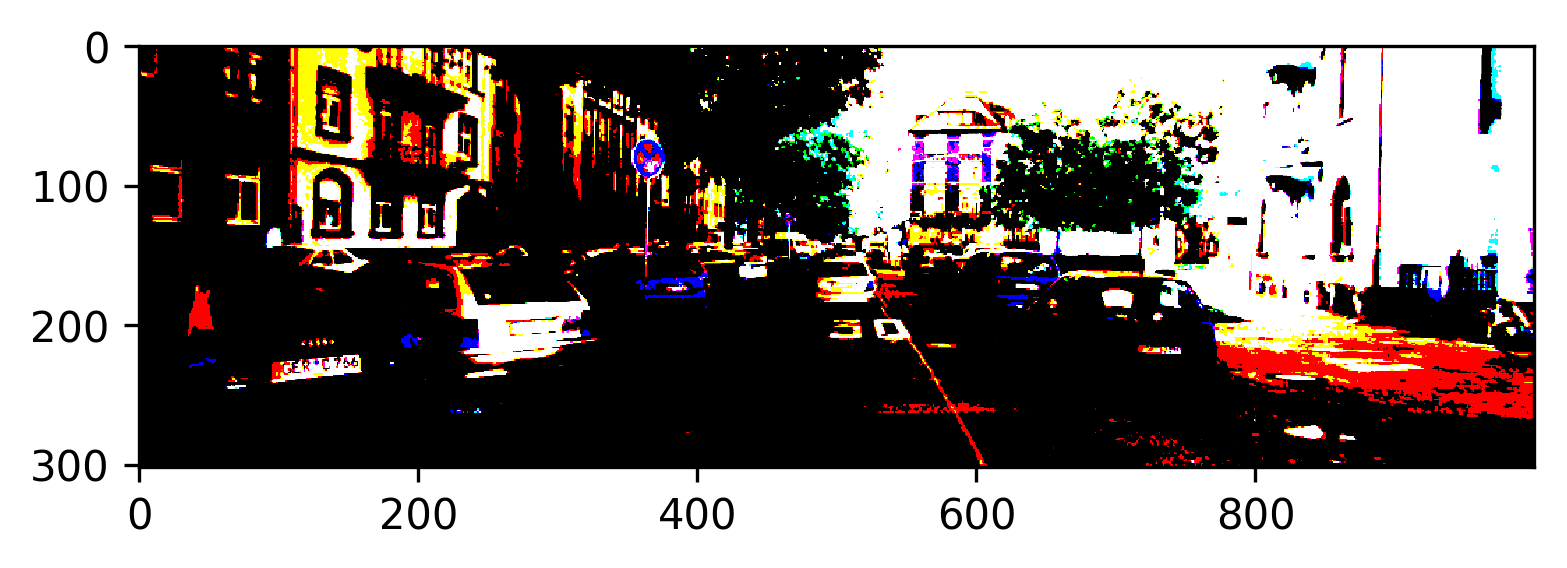

In [16]:
plt.imshow(im_data[0,:,:,:])

(1, 302, 1000, 1)
float32


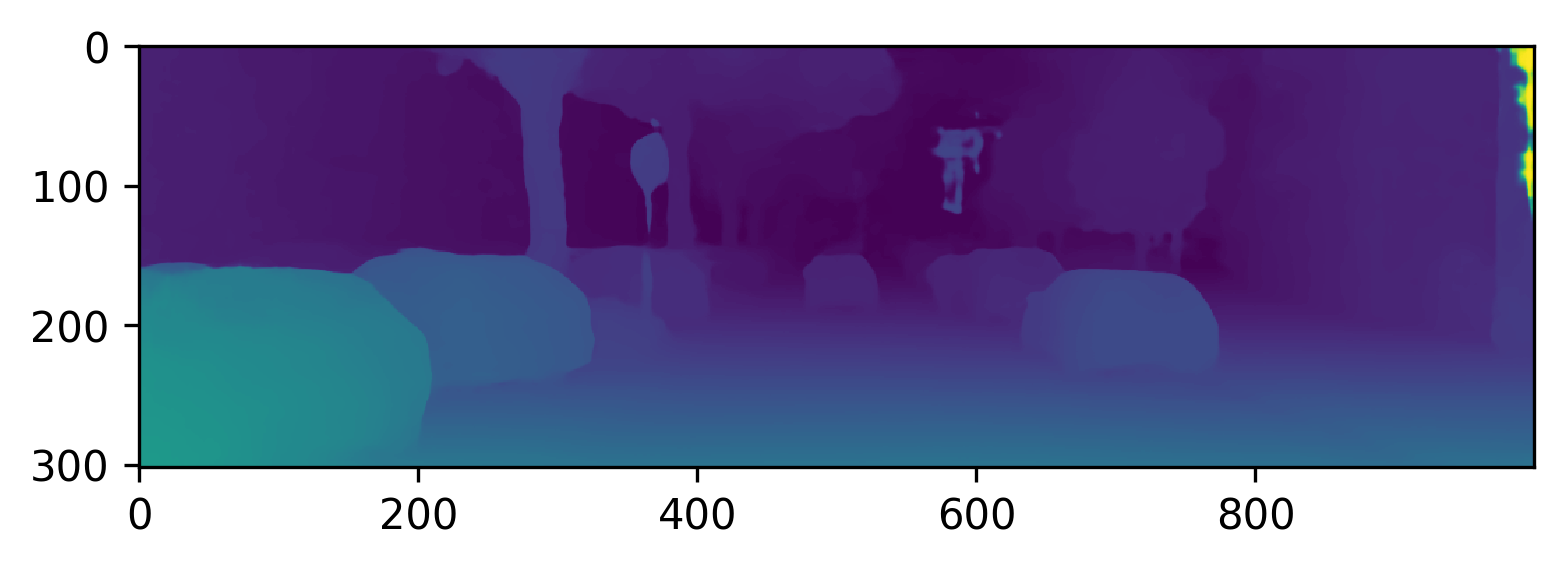

In [12]:
disp_data = blobs['data_disp']
print disp_data.shape # note: original disparity file has 3 identical channels
                      # we only take one channel
print disp_data.dtype
plt.imshow(np.uint8(disp_data[0,:,:,0])) # must convert to uint8 in order to plot

(370, 1224, 3)


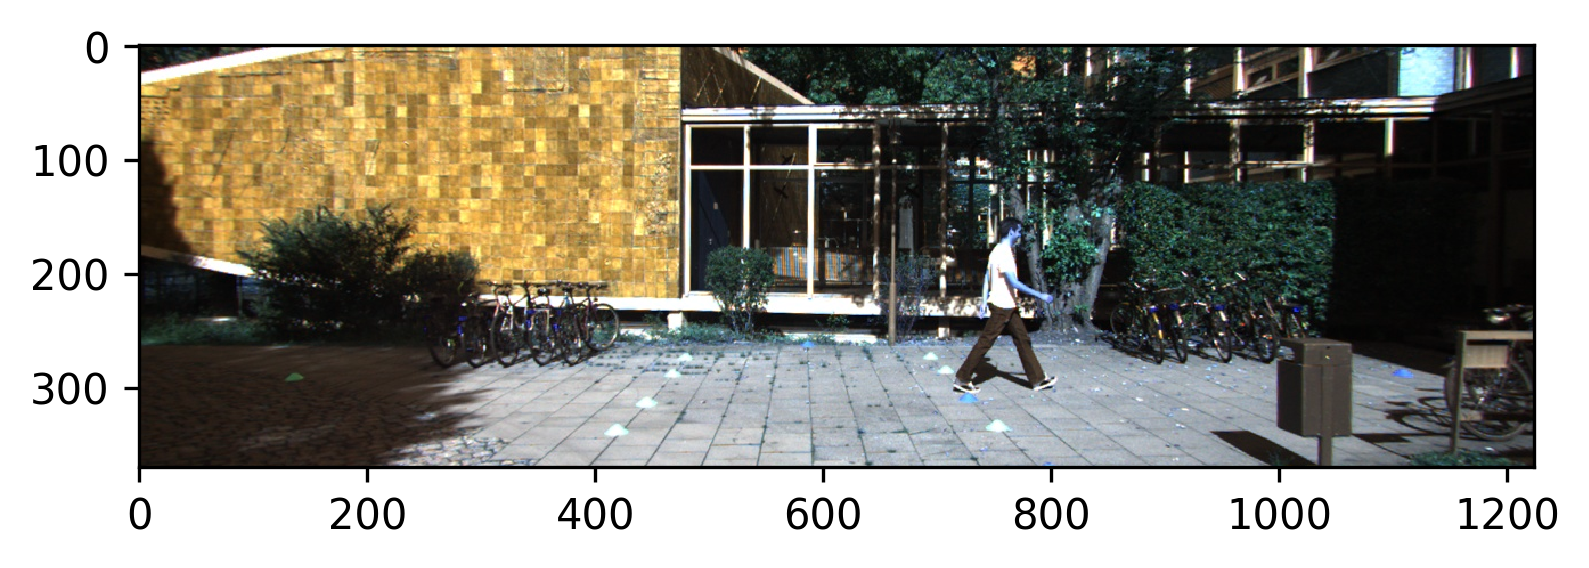

In [13]:
# read a sample rgb image
fn = "/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/000000.jpg"
im = cv2.imread(fn)
print im.shape
plt.imshow(im)

(375, 1242, 3)
uint8
0
0


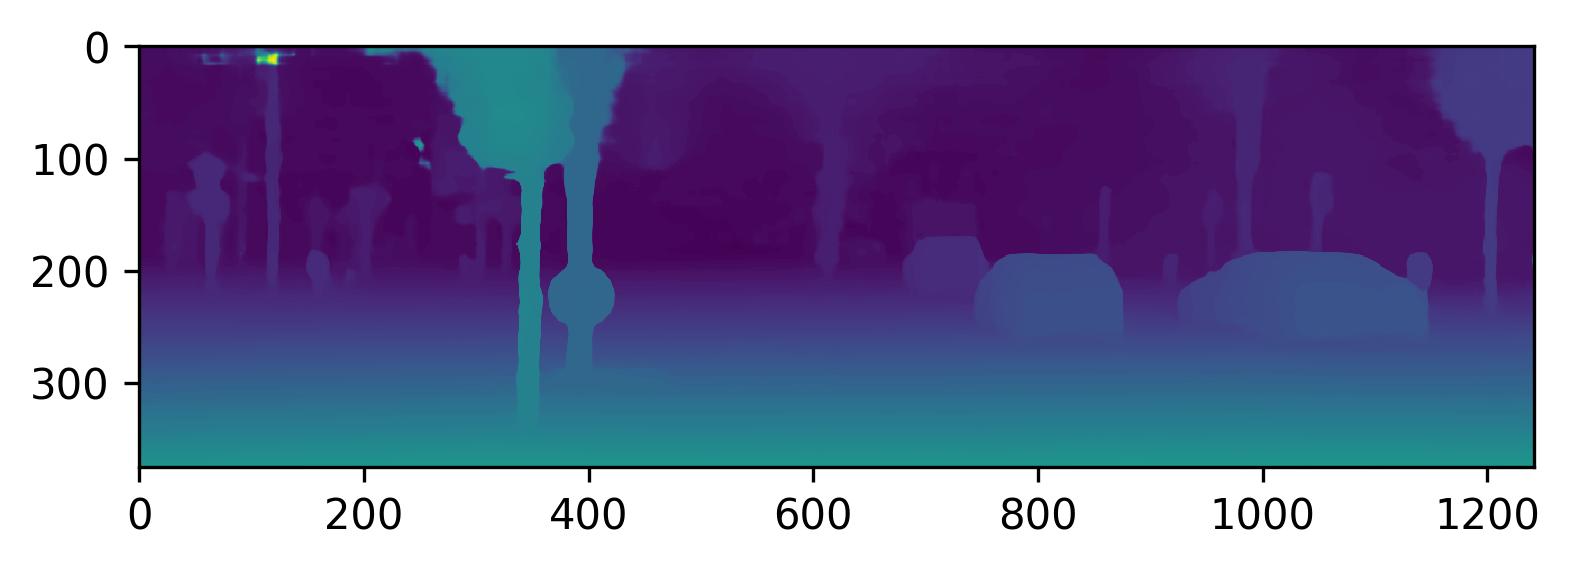

In [14]:
# read a sample disparity image
# note that the disparity map is a 3 IDENTICAL channel rgb!
# we only need to use one channel
fn = "/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/disparity/002328.png"
im = cv2.imread(fn)
print im.shape
print im.dtype
#plt.imshow(im)

im0 = im[:,:,0]
im1 = im[:,:,1]
im2 = im[:,:,2]

print np.sum(im0-im1)
print np.sum(im0-im2)

plt.imshow(im0) # only plot one channel